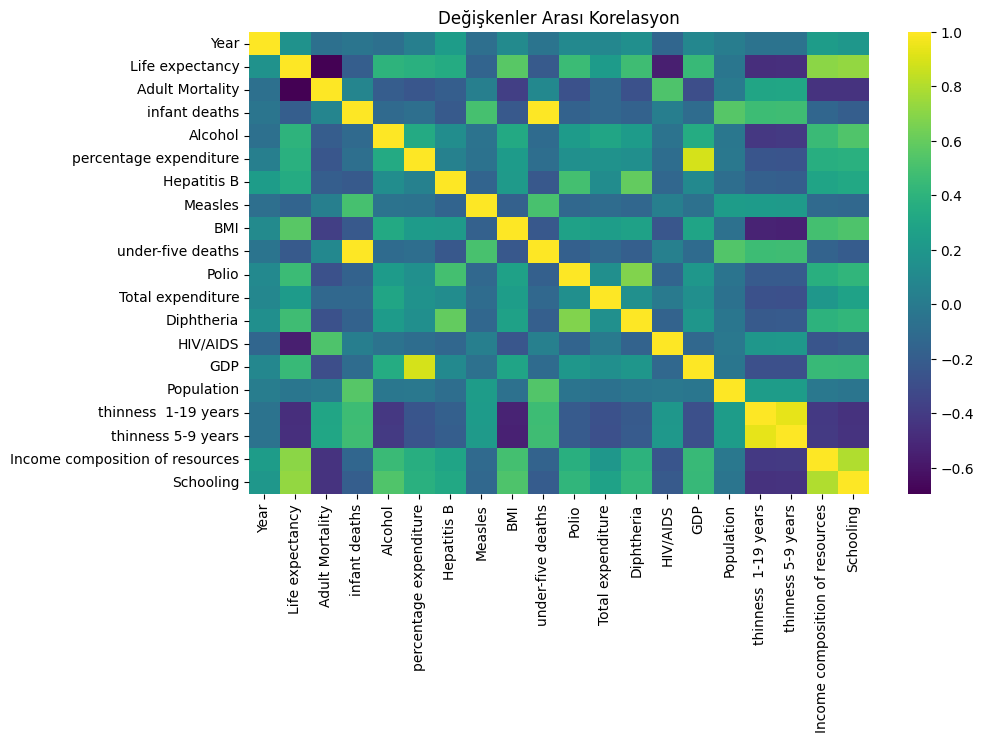

--- Model Performans Metrikleri ---
R2 Skoru (Başarı Oranı): %95.91
MAE (Ortalama Mutlak Hata): 1.19 Yıl
RMSE (Kök Ortalama Kare Hata): 1.92 Yıl
MSE (Hata Kareler Ortalaması): 3.68


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. VERİ YÜKLEME
df = pd.read_csv('Life Expectancy Data.csv')
df.columns = df.columns.str.strip() # Sütun isimlerindeki boşlukları temizle

# 2. ÖZEL EKSİK VERİ DOLDURMA (Interpolation + Status-based Median)
# Ülke ve Yıl bazında sıralama (Interpolasyon için kritik)
df = df.sort_values(by=['Country', 'Year'])

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Year' in numeric_cols: numeric_cols.remove('Year')

# A. Interpolation
for col in numeric_cols:
    df[col] = df.groupby('Country')[col].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))

# B. Status Based Median (Hala boş kalanlar için)
for col in numeric_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df.groupby('Status')[col].transform('median'))

# 3. VERİ GÖRSELLEŞTİRME (EDA)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='viridis')
plt.title("Değişkenler Arası Korelasyon")
plt.show()

# 4. MODELLEME
# Kategorik veriyi dönüştürme
df['Status'] = df['Status'].map({'Developed': 1, 'Developing': 0})

X = df.drop(['Life expectancy', 'Country', 'Year'], axis=1)
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Seçimi: Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 5. SONUÇLAR
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # MSE'nin karekökü RMSE'yi verir
mae = mean_absolute_error(y_test, y_pred) # Mutlak hata
r2 = r2_score(y_test, y_pred)

print(f"--- Model Performans Metrikleri ---")
print(f"R2 Skoru (Başarı Oranı): %{r2*100:.2f}")
print(f"MAE (Ortalama Mutlak Hata): {mae:.2f} Yıl")
print(f"RMSE (Kök Ortalama Kare Hata): {rmse:.2f} Yıl")
print(f"MSE (Hata Kareler Ortalaması): {mse:.2f}")